<a href="https://colab.research.google.com/github/dengyi1992/dlnote/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img height="60px" src="https://yt3.ggpht.com/-_HrbXXdiDsg/AAAAAAAAAAI/AAAAAAAAAAA/I8eSrNNxYjE/s68-c-k-no-mo-rj-c0xffffff/photo.jpg" align="left" hspace="20px" vspace="5px">

## TensorFlow 线性回归

**引用使用的包**

tf、np、 plt

In [0]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

**参数设定**

* learning_rate = 0.01 学习率
* training_epochs = 1000 训练迭代次数
* display_step = 50 每隔50次打印一次


In [0]:
learning_rate = 0.01
training_epochs = 1000
display_step = 50

**训练数据的定义**

In [0]:
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

**Tensorflow 输入、Weight、bias的定义**

In [0]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

Instructions for updating:
Colocations handled automatically by placer.


**线性模型的构造**

y（pred） = w*x + b

In [0]:
pred = tf.add(tf.multiply(X, W), b)

**损失函数的定义**

 均方差

In [0]:
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

**使用TensorFlow里面的梯度下降优化器**

In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Instructions for updating:
Use tf.cast instead.


**初始化变量**

In [0]:
init = tf.global_variables_initializer()

**开始训练**

Epoch: 50 cost= 0.229514509 W= 0.4679279 b= -0.76921505
Epoch: 100 cost= 0.211893216 W= 0.4549426 b= -0.67579967
Epoch: 150 cost= 0.196306631 W= 0.44272944 b= -0.5879392
Epoch: 200 cost= 0.182520047 W= 0.43124264 b= -0.5053046
Epoch: 250 cost= 0.170325518 W= 0.42043915 b= -0.42758486
Epoch: 300 cost= 0.159539238 W= 0.41027814 b= -0.35448736
Epoch: 350 cost= 0.149998710 W= 0.40072155 b= -0.2857371
Epoch: 400 cost= 0.141560107 W= 0.39173326 b= -0.22107609
Epoch: 450 cost= 0.134096131 W= 0.38327953 b= -0.16026057
Epoch: 500 cost= 0.127494320 W= 0.3753286 b= -0.10306221
Epoch: 550 cost= 0.121655129 W= 0.36785045 b= -0.049265627
Epoch: 600 cost= 0.116490424 W= 0.36081722 b= 0.0013314398
Epoch: 650 cost= 0.111922398 W= 0.35420224 b= 0.048919298
Epoch: 700 cost= 0.107882120 W= 0.3479807 b= 0.09367686
Epoch: 750 cost= 0.104308687 W= 0.3421291 b= 0.1357724
Epoch: 800 cost= 0.101148129 W= 0.33662555 b= 0.17536451
Epoch: 850 cost= 0.098352768 W= 0.3314494 b= 0.21260178
Epoch: 900 cost= 0.09588052

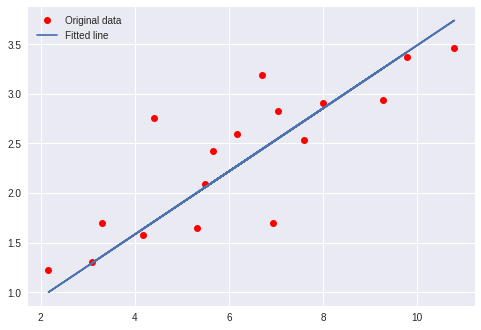

In [0]:
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()